## TASK 1.1

In [107]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point

Perform exploratory data analysis to get an understanding of the datasets. Show visualizations and statistics for all attributes of both datasets for which that makes sense. It does not make sense, e.g., for textual attributes such as the description. For some attributes, e.g. longitude and latitude, it may make sense to visualize the combination of two attributes. Finally, for every attribute print the number of missing values.

In [105]:
# READING IN DATA
test = pd.read_csv("../data/cases_test.csv")
train = pd.read_csv("../data/cases_train.csv")
locations = pd.read_csv("../data/location.csv")

cases test attributes =  age,sex,province,country,latitude,longitude,date confirmation,additional information,source,outcome  
cases train attributes =  age,sex,province,country,latitude,longitude,date confirmation,additional information,source,outcome  
locations attributes = Province State,Country Region,Last Update,Lat,Long,Confirmed,Deaths,Recovered,Active,Combined Key,Incidence Rate,Case Fatality Ratio  


In [96]:
# Lengths of each data set
print("Number of records in training data: ", len(train))
print("Number of records in test data: ", len(test))
print("Number of records in location data: ", len(locations))

# Number of unique values in each column
print("Number of unique values in each column of training data:")
print(train.nunique())
print()
print("Number of unique values in each column of test data")
print(test.nunique())
print()
print("Number of unique values in each column of location data")
print(locations.nunique())

Number of records in training data:  367636
Number of records in test data:  46500
Number of records in location data:  3954
Number of unique values in each column of training data:
age                         337
sex                           2
province                   1106
country                     131
latitude                   7297
longitude                  7293
date_confirmation           167
additional_information    14123
source                     7250
outcome                       4
dtype: int64

Number of unique values in each column of test data
age                        162
sex                          2
province                   749
country                    102
latitude                  3458
longitude                 3456
date_confirmation          153
additional_information    2181
source                    2612
outcome                      0
dtype: int64

Number of unique values in each column of location data
Province_State          562
Country_Region          

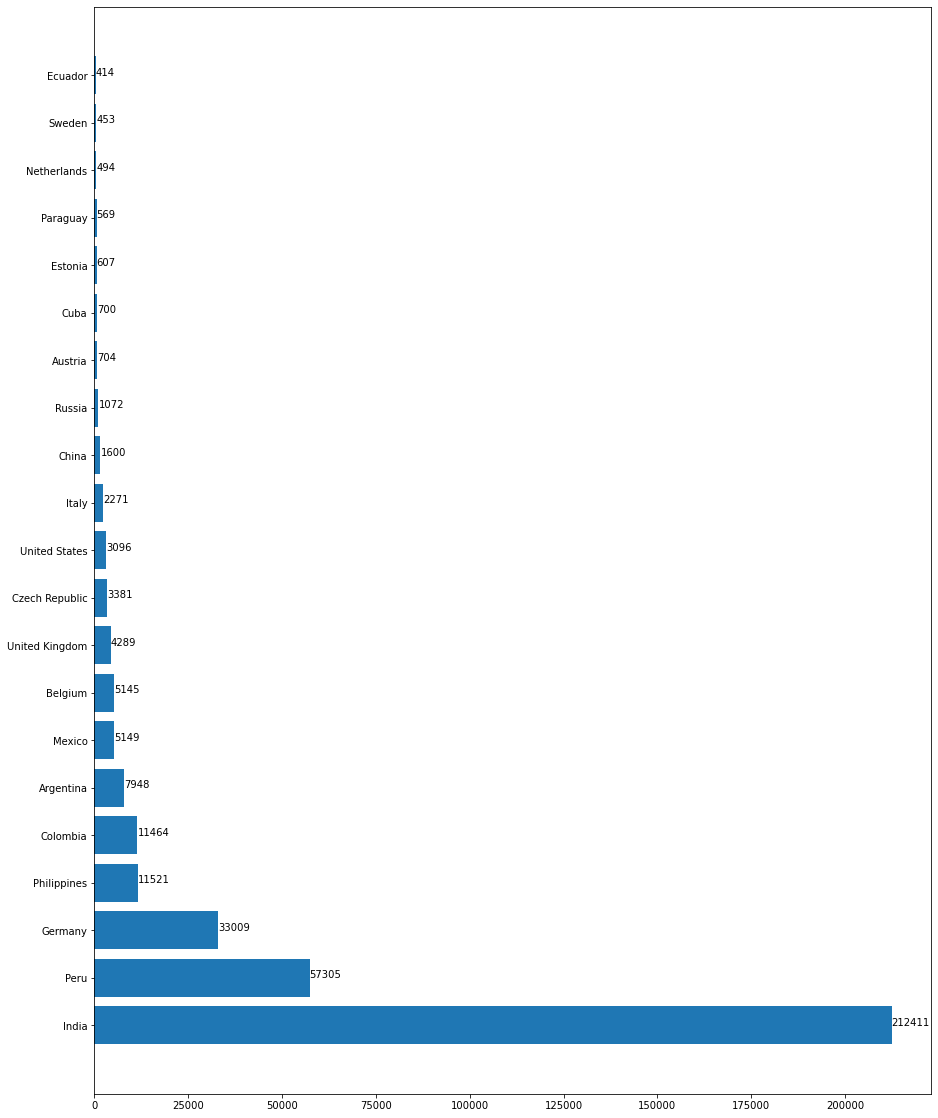

In [95]:
country = train['country'].value_counts()
country_more = country[country > 400]
country_less = country[country <= 400]
xlocs_more = [i for i in country_more.index]
ylocs_more = [i for i in country_more]
plt.figure(figsize=(15,20))
plt.barh(xlocs_more, ylocs_more)
for index, value in enumerate(ylocs_more):
    plt.text(value, index, str(value))


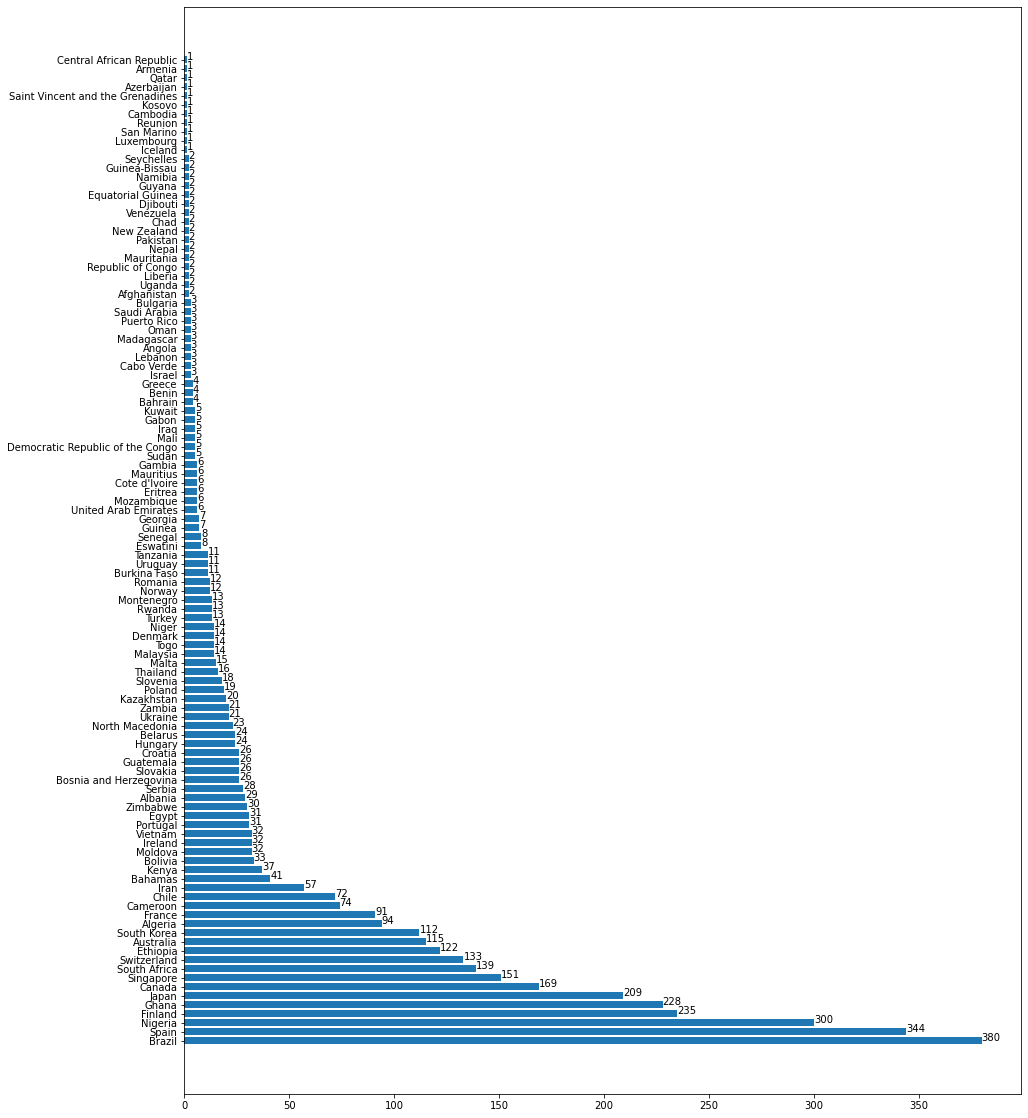

In [94]:
xlocs_less = [i for i in country_less.index]
ylocs_less = [i for i in country_less]
plt.figure(figsize=(15,20))
plt.barh(xlocs_less, ylocs_less)
for index, value in enumerate(ylocs_less):
    plt.text(value, index, str(value))

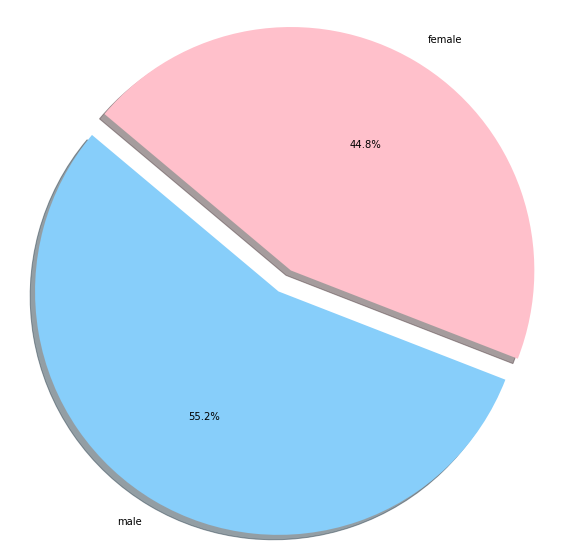

In [99]:
gender = train['sex']
gender = gender.value_counts()
xlocs = [i for i in gender.index]
ylocs = [i for i in gender]
plt.figure(figsize=(10,10))
colors = ['lightskyblue', 'pink']
explode = (0.1, 0)
plt.pie(ylocs, explode=explode, labels=xlocs, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

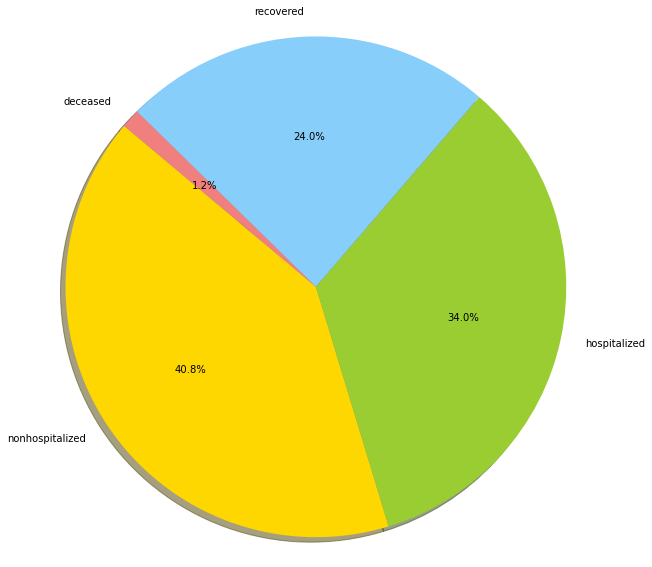

In [101]:
outcome = train['outcome']
outcome = outcome.value_counts()
xlocs = [i for i in outcome.index]
ylocs = [i for i in outcome]
plt.figure(figsize=(10,10))
colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0)
plt.pie(ylocs, explode=explode, labels=xlocs, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

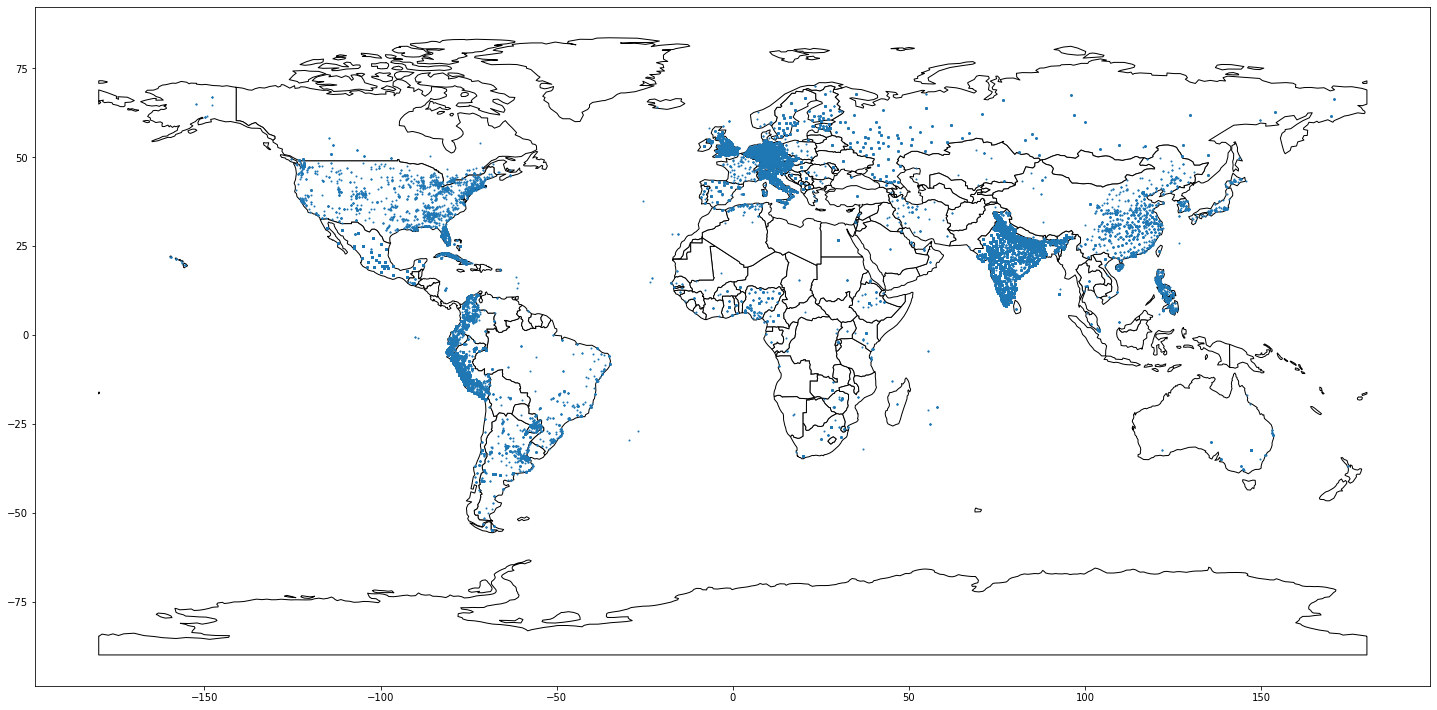

In [124]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black', figsize=(25,50))
geometry = [Point(xy) for xy in zip(train['longitude'], train['latitude'])]
gdf = gpd.GeoDataFrame(train, crs="epsg:4326", geometry=geometry)
gdf.plot(ax = base, marker='o', markersize=1, figsize=(25,50))

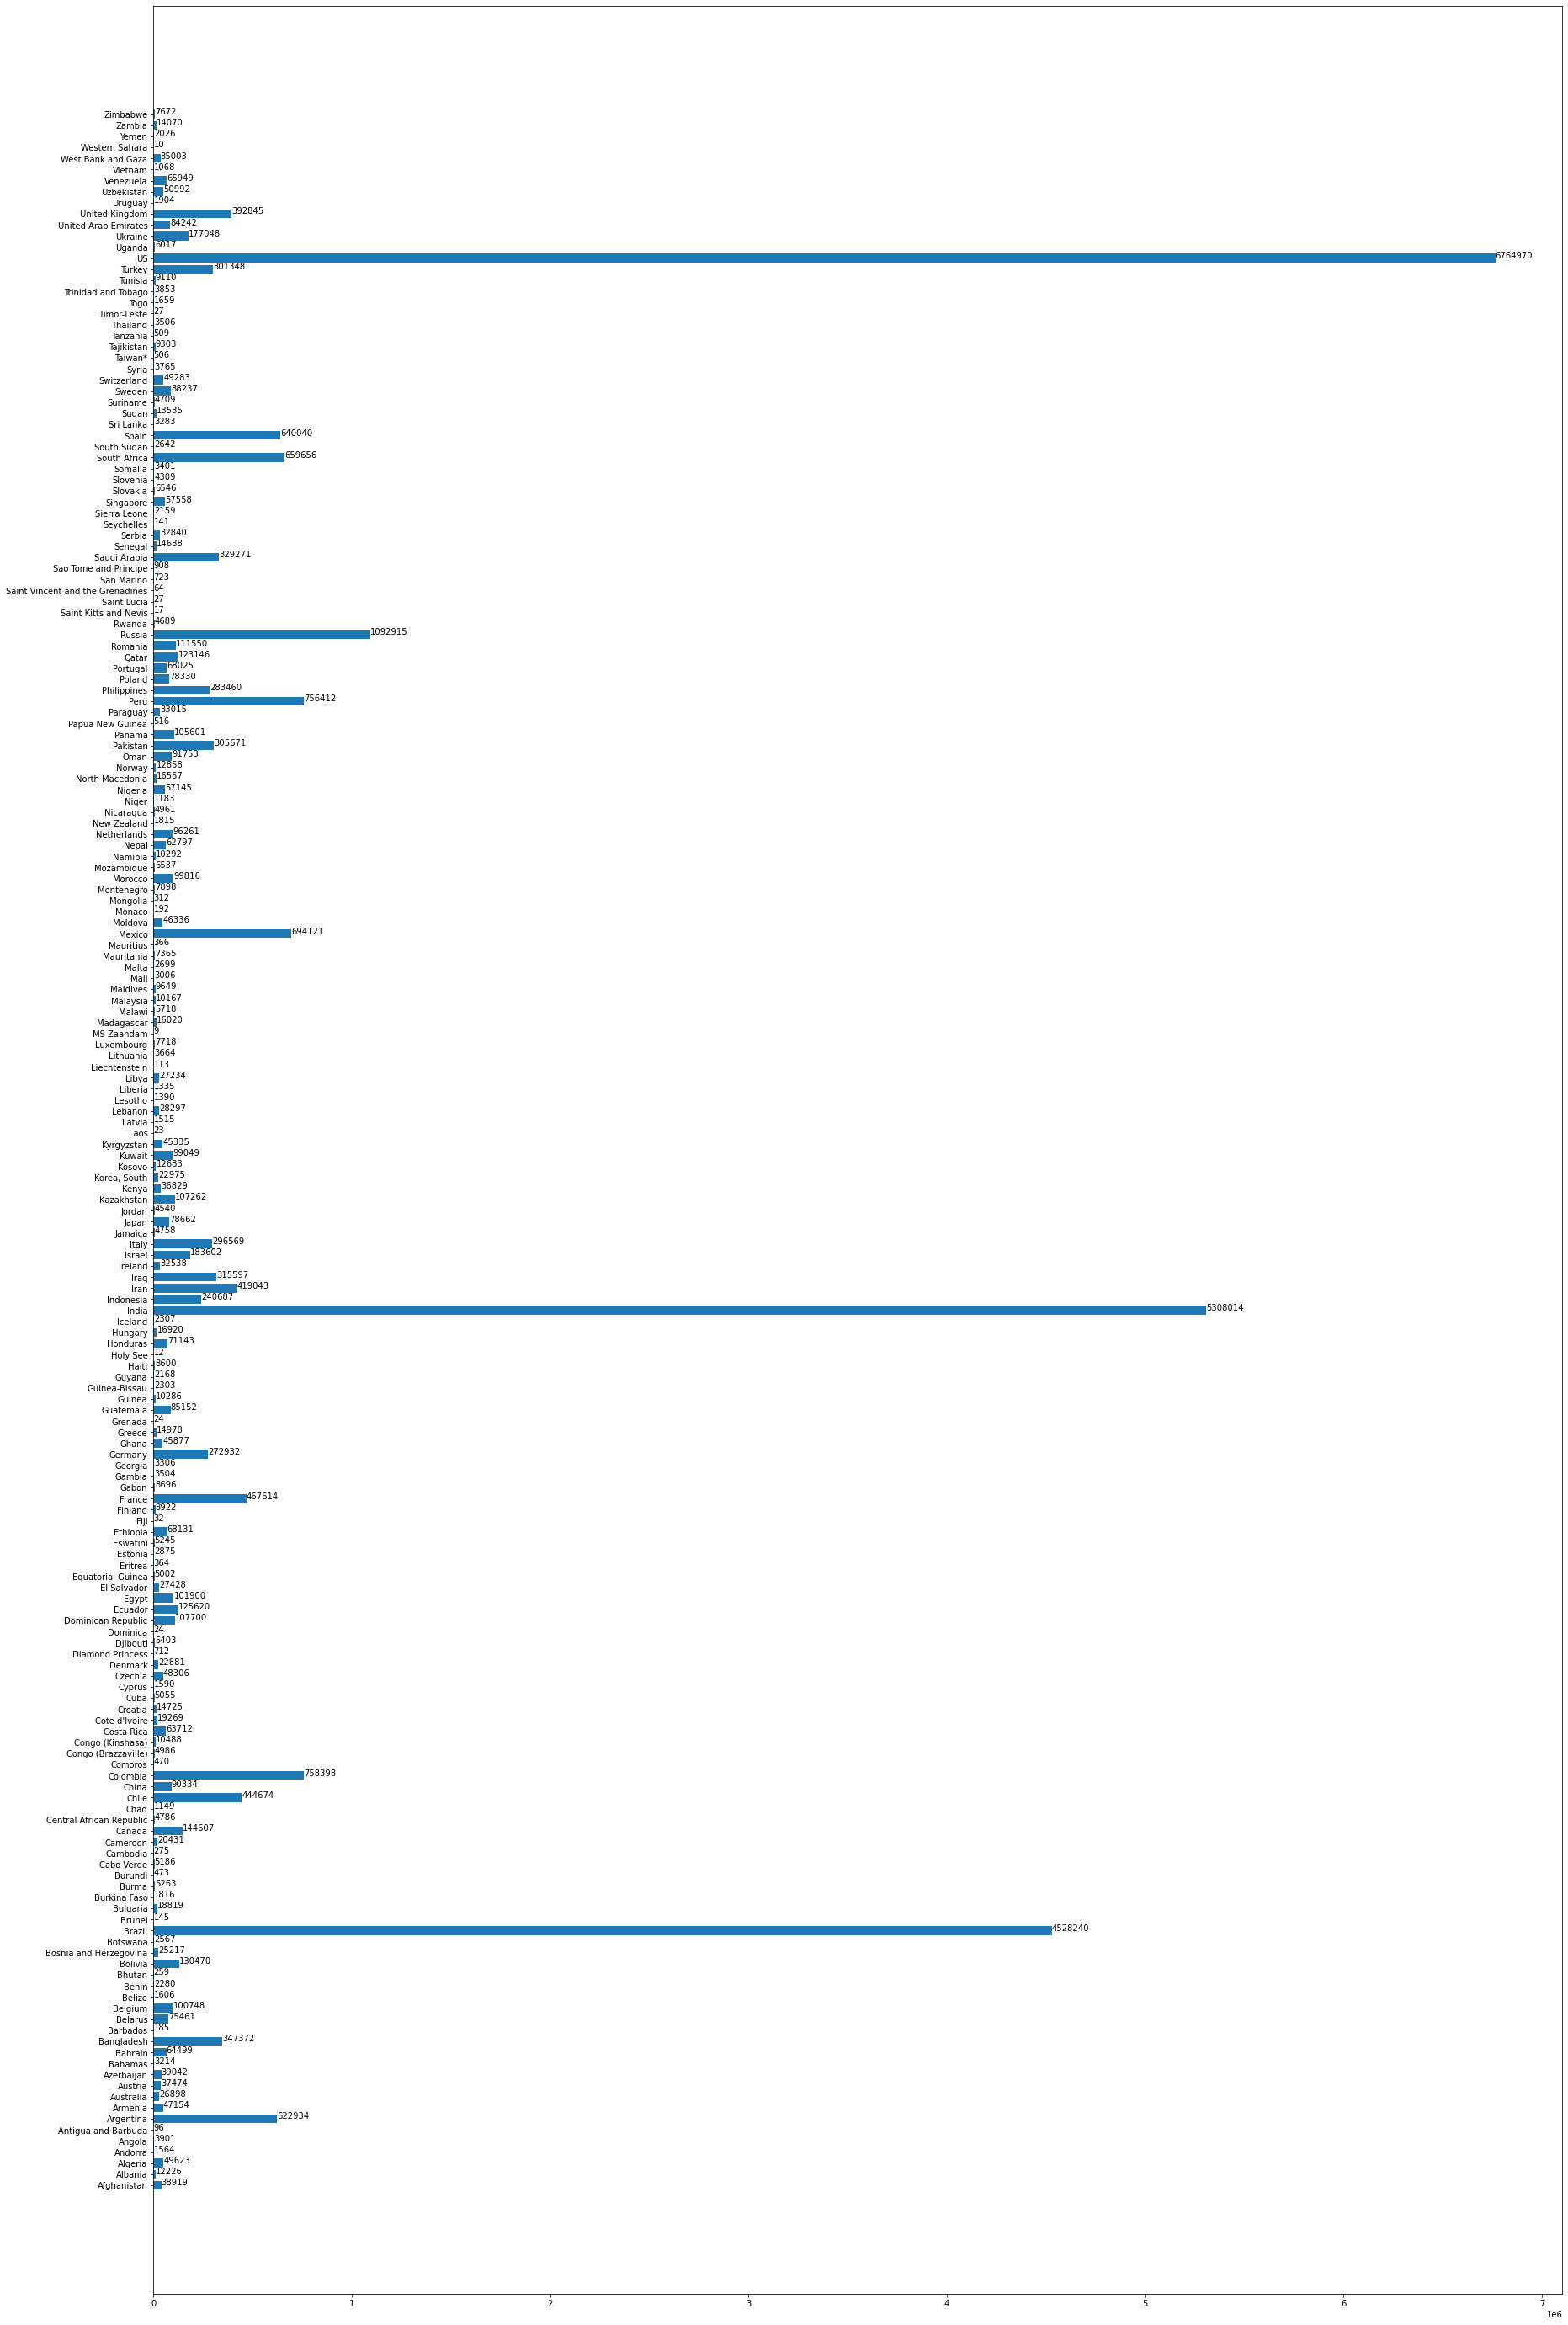

In [129]:
confirmed = locations.groupby(['Country_Region']).sum()['Confirmed']
xlocs = [i for i in confirmed.index]
ylocs = [i for i in confirmed]
plt.figure(figsize=(30,50))
plt.barh(xlocs, ylocs)
for index, value in enumerate(ylocs):
    plt.text(value, index, str(value))


In [32]:
# Number of missing values
print("Number of missing values in test data:")
print(test.isnull().sum())
print("Number of missing values in training data:")
print(train.isnull().sum())
print("Number of missing values in location data:")
print(locations.isnull().sum())


Number of missing values in test data:
age                       25516
sex                       25199
province                    573
country                       0
latitude                      0
longitude                     0
date_confirmation            49
additional_information    43490
source                    16903
outcome                   46500
dtype: int64
Number of missing values in training data:
age                       209265
sex                       207084
province                    4106
country                       18
latitude                       2
longitude                      2
date_confirmation            288
additional_information    344912
source                    128478
outcome                        0
dtype: int64
Number of missing values in location data:
Province_State         168
Country_Region           0
Last_Update              0
Lat                     80
Long_                   80
Confirmed                0
Deaths                   0
Recovered 